# Imports

In [6]:
# Common
import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Image Processing
import cv2
from PIL import Image

# Constants

In [2]:
CSV_PATH = '/kaggle/input/horse-riding-jumping-walking/640x360.csv'

# Utils

In [14]:
def plt_img(image, cmap="gray"):
    """Display an image using matplotlib"""
    plt.imshow(image, cmap)
    plt.axis('on')
    plt.show()


# Function to safely convert a string to a list of integers
def parse_bbox(value):
    try:
        # Remove square brackets and split by spaces, then convert to integers
        return list(map(int, value.strip('[]').split()))
    except Exception as e:
        print(f"Error parsing bbox: {e}")
        return []

# Function to safely convert a string to a tuple of integers (for color columns)
def parse_color(value):
    try:
        # Remove parentheses and split by commas, then convert to integers
        return tuple(map(int, value.strip('()').split(',')))
    except Exception as e:
        print(f"Error parsing color: {e}")
        return ()


# Code

In [30]:
df = pd.read_csv(CSV_PATH)
df = df.sort_values(by='frame_name', ascending=True)
df.head()

,frame_name,bbox,255_128_0,255_153_51,255_178_102,230_230_0,255_153_255,153_204_255,255_102_255,255_51_255,...,255_153_153,255_102_102,255_51_51,153_255_153,102_255_102,51_255_51,0_255_0,0_0_255,255_0_0,255_255_255
9,66,[ 96 154 229 233],"(226, 156)","(225, 156)","(221, 154)","(218, 154)","(233, 163)","(214, 172)","(144, 176)","(206, 159)",...,"(159, 194)","(151, 195)","(187, 214)","(206, 212)","(134, 211)","(151, 210)","(183, 227)","(197, 222)","(134, 223)","(162, 224)"
8,99,[131 149 234 230],"(227, 155)","(224, 160)","(216, 151)","(218, 153)","(233, 163)","(213, 173)","(141, 175)","(202, 164)",...,"(163, 193)","(158, 192)","(188, 213)","(211, 211)","(138, 206)","(155, 209)","(180, 226)","(201, 221)","(140, 225)","(166, 224)"
88,132,[130 149 236 232],"(227, 153)","(222, 154)","(215, 150)","(216, 150)","(232, 162)","(214, 170)","(145, 174)","(200, 164)",...,"(162, 194)","(153, 193)","(192, 213)","(192, 215)","(159, 211)","(143, 208)","(208, 223)","(185, 226)","(171, 226)","(151, 227)"
23,165,[132 148 238 232],NaN,"(223, 158)",NaN,"(219, 153)","(228, 162)","(214, 170)","(144, 176)","(201, 162)",...,"(163, 195)","(154, 195)",NaN,"(197, 212)","(161, 212)","(148, 210)","(215, 225)","(190, 221)","(171, 228)","(157, 228)"
28,198,[133 148 241 235],NaN,NaN,NaN,NaN,"(184, 180)","(212, 171)","(148, 175)","(196, 168)",...,"(157, 194)","(155, 193)","(219, 207)","(218, 209)","(153, 212)","(155, 213)","(224, 226)","(191, 219)","(165, 223)","(166, 229)"


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 9 to 70
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   frame_name   127 non-null    int64 
 1   bbox         115 non-null    object
 2   255_128_0    107 non-null    object
 3   255_153_51   113 non-null    object
 4   255_178_102  109 non-null    object
 5   230_230_0    112 non-null    object
 6   255_153_255  114 non-null    object
 7   153_204_255  115 non-null    object
 8   255_102_255  108 non-null    object
 9   255_51_255   115 non-null    object
 10  102_178_255  105 non-null    object
 11  51_153_255   115 non-null    object
 12  255_153_153  88 non-null     object
 13  255_102_102  101 non-null    object
 14  255_51_51    110 non-null    object
 15  153_255_153  114 non-null    object
 16  102_255_102  96 non-null     object
 17  51_255_51    96 non-null     object
 18  0_255_0      114 non-null    object
 19  0_0_255      114 non-null    object

In [32]:
# Create a blank image (360x640) with 3 color channels (RGB)
img = np.zeros((360, 640, 3), dtype=np.uint8)

# Select the first row from the DataFrame
first_row = df.iloc[0]

# Draw the rectangle using bbox coordinates
if pd.notnull(first_row['bbox']):
    bbox = parse_bbox(first_row['bbox'])
    if len(bbox) == 4:  # Ensure bbox contains exactly 4 coordinates
        x_min, y_min, x_max, y_max = bbox
        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=(255, 0, 0), thickness=2)  # Use blue color for bbox

# Plot points for each color column
for column in df.columns[2:]:
    color_values = column.split('_')  # Extract the RGB values from the column name
    color = tuple(map(int, color_values))  # Convert to a tuple of integers

    if color == (255, 255, 255) or color == (255,0,0) or color == (0,255,0) or color == (0,0,255):
        if pd.notnull(first_row[column]):
            point = parse_color(first_row[column])  # Convert the point string to a tuple of integers
            if len(point) == 2:  # Ensure point contains exactly 2 coordinates
                x, y = point
                cv2.circle(img, (x, y), radius=5, color=color, thickness=-1)  # Draw the point with the specific color

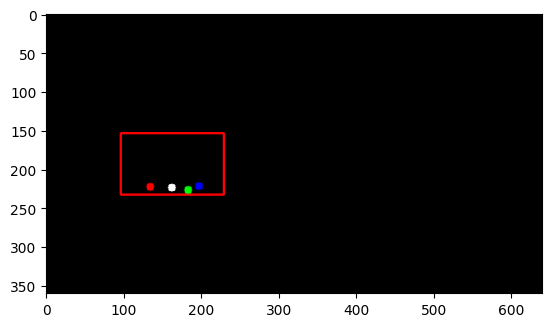

In [33]:
plt_img(img)